Re-run cell with animated chart multiple times in Jupyter Notebook <br>
[Ref](https://stackoverflow.com/questions/35532498/animation-in-ipython-notebook)<br>
[Ref](https://discourse.jupyter.org/t/matplotlib-animation-not-appearing-in-jupyter-notebook/24938/5)


In [35]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib as mpl
import bar_chart_race as bcr
import seaborn as sns

# Re-run cell with animated chart multiple times in Jupyter Notebook
# plt.rcParams["animation.html"] = "jshtml"
# plt.ioff()

In [36]:
# Get S&P 500 companies with theirs tickers: less stable but faster method
wiki_url = "https://en.wikipedia.org/wiki/List_of_S&P_500_companies"
# identify the table in the HTML by its unique id
sp500 = pd.read_html(wiki_url, attrs={"id": "constituents"})[0]
sp500.sort_values("Symbol", inplace=True)

In [ ]:
# For backup: yfinance max period to 06/01/2025 outputs: 15861 rows × 503 columns
stock_price_df_max = pd.read_csv("stock_price_max.csv", index_col="Date")
# Convert index to a DatetimeIndex for easier subsetting
stock_price_df_max.index = pd.to_datetime(stock_price_df_max.index, utc=True)

**For backup**

```python
price_list = []
for ticker in sp500["Symbol"]:
    try:
        stock = yf.Ticker(ticker)
        stock.info["shortName"]
    except KeyError:
        stock = yf.Ticker(ticker.replace(".", "-"))
    stock_history = stock.history(start="2024-01-01", end="2024-12-31", interval="1mo")
    price_list.append(stock_history["Close"].rename(ticker, inplace=True))

stock_price_df = pd.concat(price_list, axis=1)
stock_price_df.index = stock_price_df.index.strftime("%d/%m/%Y")
stock_price_df.to_csv("stock_price_2024.csv", index_label="Date")
```


In [59]:
stock_price_df_2024 = pd.read_csv(
    "stock_price_2024.csv", parse_dates=["Date"], index_col="Date"
)

c:\Users\maitp\anaconda3\envs\general\Lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


In [61]:
stock_price_df_2024.index = stock_price_df_2024.index.strftime("%d/%m/%Y")

c:\Users\maitp\anaconda3\envs\general\Lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:


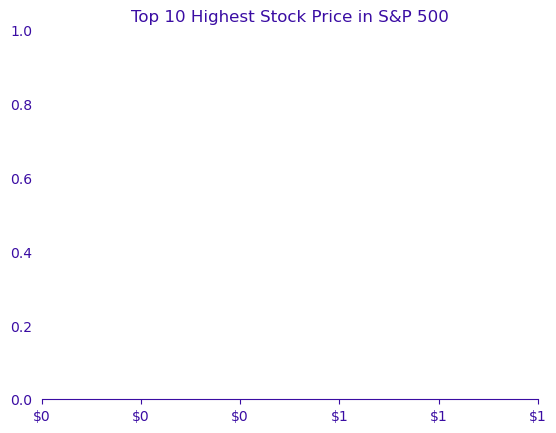

In [45]:
color = "#3a0ca3"
fig, ax = plt.subplots()
palette = sns.color_palette("viridis", 10)
# runtime configuration variable mpl.rcParams is global to the mpl package:
mpl.rcParams["text.color"] = color
ax.set_title("Top 10 Highest Stock Price in S&P 500")
sns.despine(left=True)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${x:,.0f}"))
ax.tick_params(left=False, colors=color)
ax.spines["bottom"].set_color(color)

In [ ]:
animation = bcr.bar_chart_race(
    stock_price_df_2024,
    n_bars=10,
    period_length=1500,
    steps_per_period=20,
    filter_column_colors=True,
    fig=fig,
    cmap=palette,
    bar_label_size=10,
)

c:\Users\maitp\anaconda3\envs\general\Lib\site-packages\bar_chart_race\_make_chart.py:889: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_values.iloc[:, 0] = df_values.iloc[:, 0].fillna(method='ffill')


In [44]:
animation

In [63]:
type(animation)

IPython.core.display.HTML

In [48]:
from taipy.gui import Gui, notify
import taipy.gui.builder as tgb

with tgb.Page() as page:
    tgb.html(animation)

In [49]:
gui = Gui(page)
gui.run()

[2025-01-08 01:35:34.131][Taipy][INFO] Running in 'single_client' mode in notebook environment
[2025-01-08 01:35:38.824][Taipy][INFO]  * Server starting on http://127.0.0.1:5000


c:\Users\maitp\anaconda3\envs\general\Lib\site-packages\gevent\hub.py:161: UserWarning: libuv only supports millisecond timer resolution; all times less will be set to 1 ms
  with loop.timer(seconds, ref=ref) as t:
